# Project E8: KAGGLE - TWO PATHS TO PREDICTING SUCCESS

Project for IDS course 2025. By Nele-Liis Võhma and Marek Kalda.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#!pip install xgboost

from xgboost import XGBRegressor

## 1. Exploring the dataset

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")
display(data.head())
display(data.info())
display(data.describe(include="all"))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


### Missing values per each column

In [3]:
print(data.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Categorical features: checking unique values

In [4]:
categorical = data.select_dtypes(include='object')
for col in categorical.columns:
    print(col, data[col].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low' nan]
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home ['Near' 'Moderate' 'Far' nan]
Gender ['Male' 'Female']


NaN values in columns "Teacher_Quality", "Parental_Education_Level" and "Distance_from_Home".

### Numeric features: histogram of numerical features distributions and checking correlation with target (exam score).

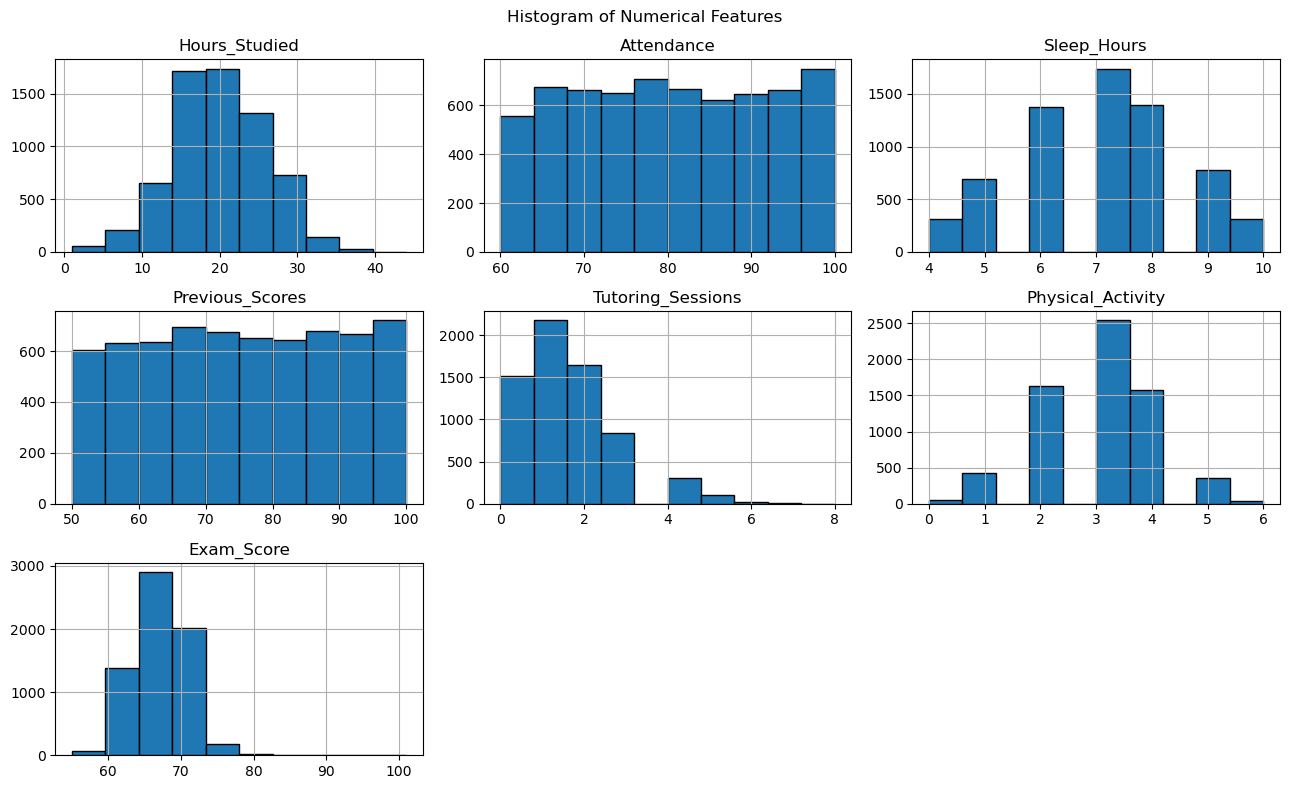

In [5]:
numeric = data.select_dtypes(include='int64')
data[numeric.columns].hist(bins=10, figsize=(13, 8), edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.grid(True)
plt.tight_layout()
plt.show()

Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

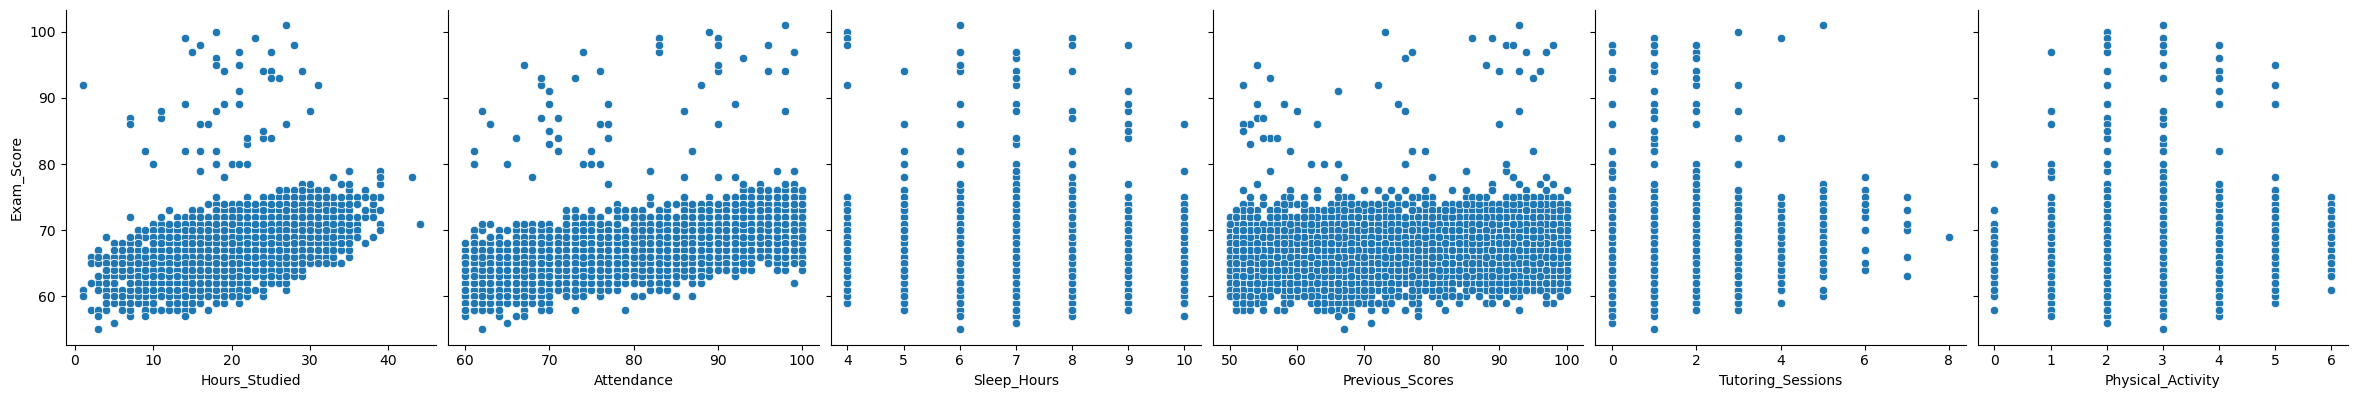

In [6]:
target = "Exam_Score"
corr = data.corr(numeric_only=True)
display(corr[target].sort_values(ascending=False))

sns.pairplot(numeric, x_vars=numeric.drop(columns=[target]).columns, y_vars=target, height=4, kind='scatter')
plt.show()

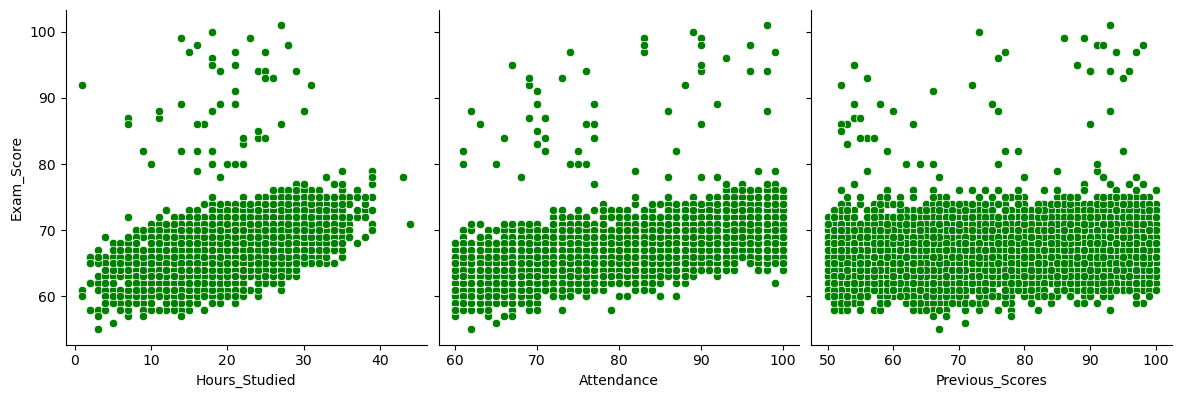

In [7]:
# figure for poster
features = numeric.drop(columns=[target, "Sleep_Hours", "Tutoring_Sessions", "Physical_Activity"])
sns.pairplot(numeric, x_vars=features.columns, y_vars=target, height=4, kind='scatter', plot_kws={"color": "green"})
plt.show()

### Categorical features versus target value
Average exam score by each feature.

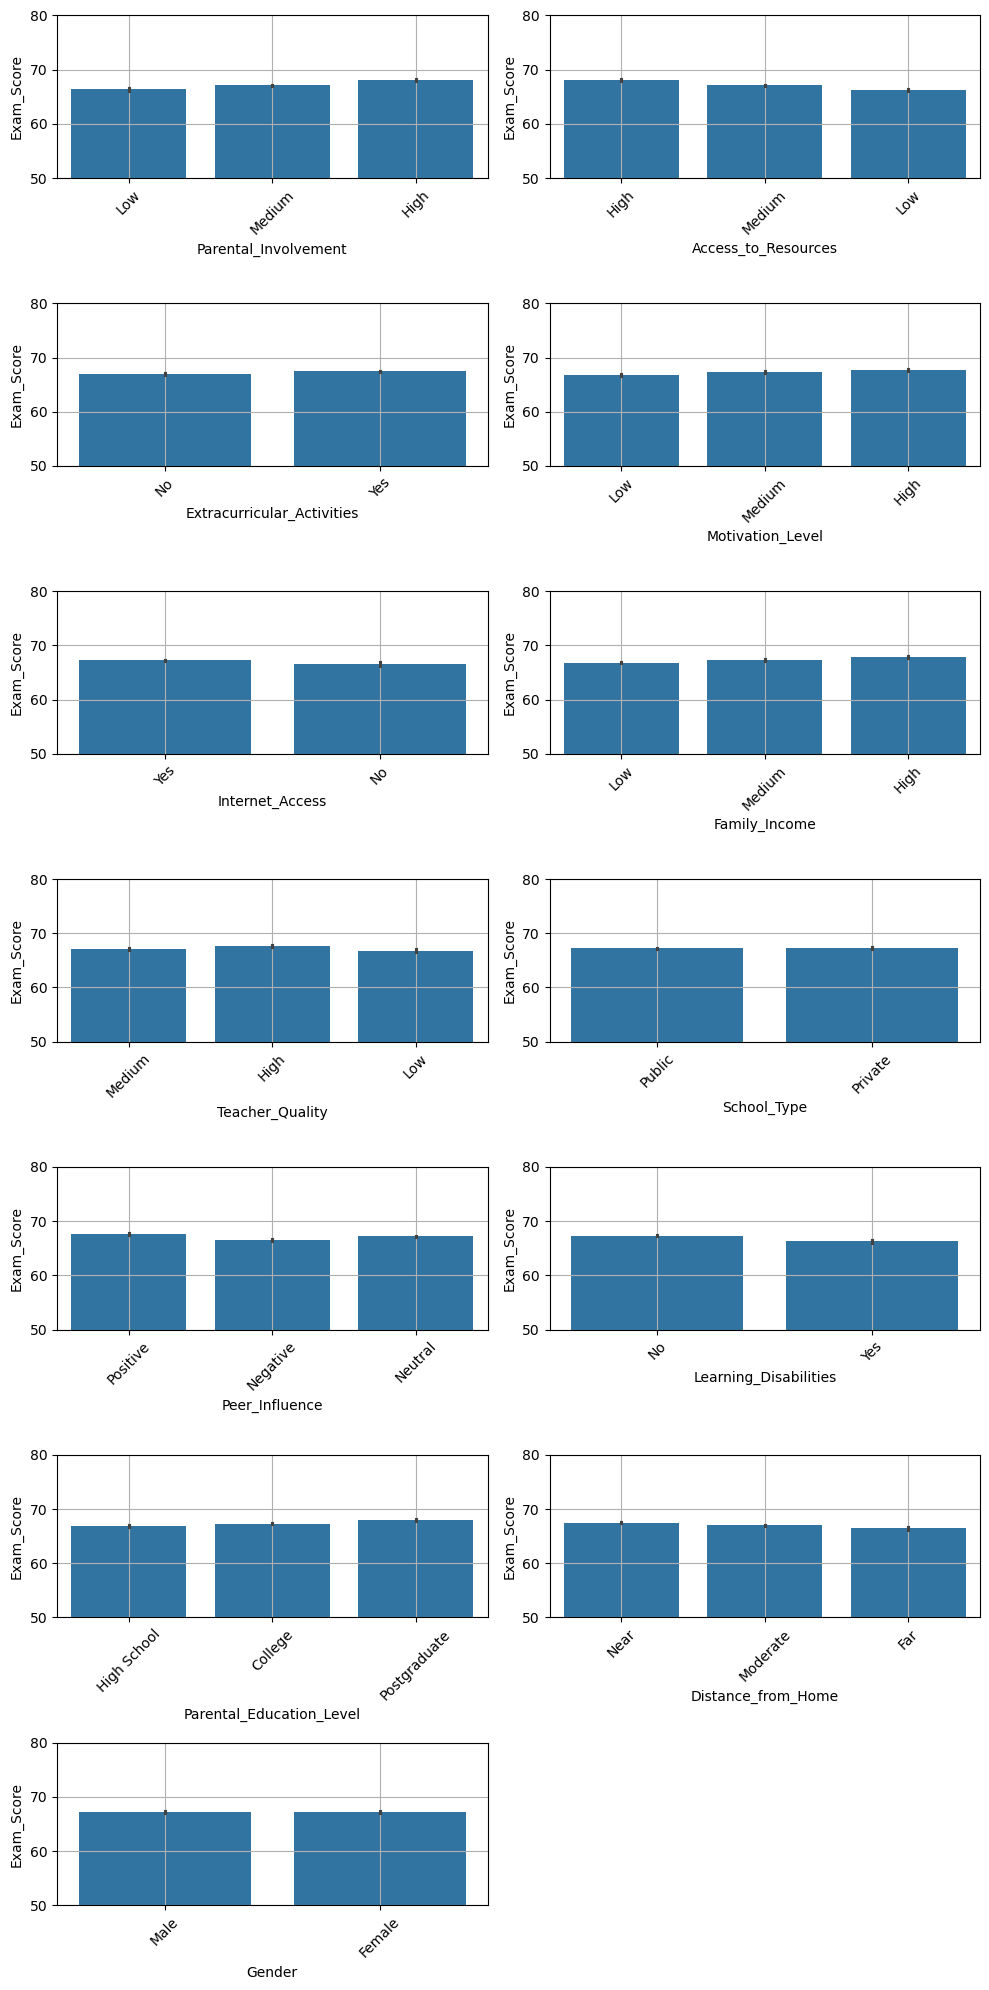

In [8]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical.columns, 1):
    plt.subplot(len(categorical.columns)//2 + 1, 2, i)
    sns.barplot(
        data=data,
        x=col,
        y=target,
        estimator='mean'
    )
    plt.ylim(50, 80)
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Preparing the data for modelling

In [9]:
data = data.dropna()
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [10]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 101
Missing values count: 0


In [11]:
# changing the exam score from 101 to 100
display(data[data["Exam_Score"] == 101])
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100
print("Max grade after changes:", data["Exam_Score"].max())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


Max grade after changes: 100


In [12]:
for col in data.select_dtypes(include="object").columns:
    if set(data[col].unique()) == {"Yes", "No"} or set(data[col].unique()) == {"No", "Yes"}:
        data[col] = data[col].map({"No": 0, "Yes": 1})

In [13]:
display(data.shape)
data.drop_duplicates()
display(data.shape) # no duplicate rows
display(data.head())

(6378, 20)

(6378, 20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,Public,Neutral,4,0,College,Near,Female,70


### Correlations for every feature

In [14]:
data_dummies_eval = pd.get_dummies(data)
print(data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False))

Exam_Score                               1.000000
Attendance                               0.580394
Hours_Studied                            0.445209
Previous_Scores                          0.174292
Tutoring_Sessions                        0.156769
Access_to_Resources_High                 0.141711
Parental_Involvement_High                0.139788
Parental_Education_Level_Postgraduate    0.092298
Distance_from_Home_Near                  0.081280
Peer_Influence_Positive                  0.080214
Family_Income_High                       0.073546
Teacher_Quality_High                     0.071623
Extracurricular_Activities               0.063051
Motivation_Level_High                    0.062914
Internet_Access                          0.051281
Physical_Activity                        0.025155
Family_Income_Medium                     0.024963
Motivation_Level_Medium                  0.022556
Parental_Education_Level_College         0.017985
School_Type_Private                      0.010898


## 3. Training regression models

### Methods for the process

#### Finding dummies

In [15]:
def get_dummies(data):
    data_dummies = pd.get_dummies(data, drop_first=True) 
    
    X = data_dummies.drop(columns=["Exam_Score"])
    y = data_dummies["Exam_Score"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    
    scaler = StandardScaler() ## Doesnt work yet
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

#### MSE and RMSE

In [16]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

#### Finding best alpha for Lasso and Ridge models using cross validation.

In [17]:
def get_best_alpha(model,X,y,alphas): ### Find best alpha for Ridge and Lasso using cross-val
    kf = KFold(n_splits=3, random_state = 0, shuffle=True)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, val_indexes in kf.split(X):
            X_train, X_val = X.values[train_indexes], X.values[val_indexes]
            y_train, y_val = y.values[train_indexes], y.values[val_indexes]

            model.fit(X_train, y_train)
            rmse = RMSE(y_val,model.predict(X_val))
            results.append((alpha, rmse))
   

    best_alpha, rmse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, rmse

#### Method that trains all of the models

In [18]:
def run_models(X_train, X_test, y_train, y_test, model_dict, cv=3):
    models = {}
    results = []

    for name, model in model_dict.items():

        # Cross validation
        cv_rmse_scores = -cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1
        )

        cv_rmse = cv_rmse_scores.mean()

        #Fit the model
        model.fit(X_train, y_train)
        models[name] = model

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "CV_RMSE": cv_rmse,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        })

    return models, results

#### Finds RMSE and R2 scores for all the models using results from the previous method

In [19]:
def find_scores(y_train, y_test, results):

    scores = []
    for res in results:
        model_name = res["Model"]
        y_train_pred = res["y_train_pred"]
        y_test_pred = res["y_test_pred"]
        
        train_rmse = RMSE(y_train, y_train_pred)
        test_rmse = RMSE(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        scores.append({
                "Model": model_name,
                "Train RMSE": round(train_rmse, 5),
                "CV RMSE": round(res["CV_RMSE"], 5),
                "Test RMSE": round(test_rmse, 5),
                "Train R2": round(train_r2, 5),
                "Test R2": round(test_r2, 5)
            })
    
    scores_df = pd.DataFrame(scores)
    print(scores_df)
    return scores

#### Plots predicted vs actual data

In [20]:
def analysis(y_true, y_pred, data_type, model_name="Model"):

    # Predicted vs Actual    
    plt.scatter(y_pred, y_true, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--')  # diagonal line
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} : Predicted vs Actual")
    
    plt.show()

#### Initial test with Linear, Ridge and Lasso

In [21]:
X_train, X_test, y_train, y_test = get_dummies(data)

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

ridge_alpha, _ = get_best_alpha(Ridge(), X_train, y_train, np.linspace(0.01, 10, 50))
lasso_alpha, _ = get_best_alpha(Lasso(), X_train, y_train, np.linspace(0.001, 1, 50))

print("Ridge best alpha:", ridge_alpha)
print("Lasso best alpha:", lasso_alpha)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_alpha),
    "Lasso": Lasso(alpha=lasso_alpha),
}

result_models, results = run_models(X_train_s, X_test_s, y_train, y_test, models, 3)

Ridge best alpha: 6.737959183673469
Lasso best alpha: 0.001


In [22]:
scores = find_scores(y_train, y_test, results)

    Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  Linear     2.05784  2.05126    2.08933   0.72275  0.71711
1   Ridge     2.05785  2.05123    2.08948   0.72275  0.71707
2   Lasso     2.05786  2.05118    2.08951   0.72274  0.71706


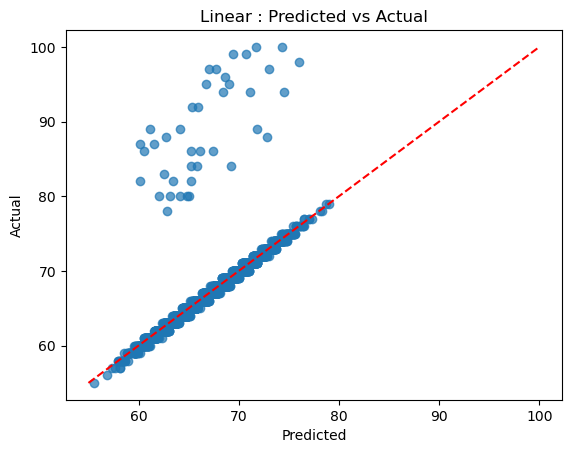

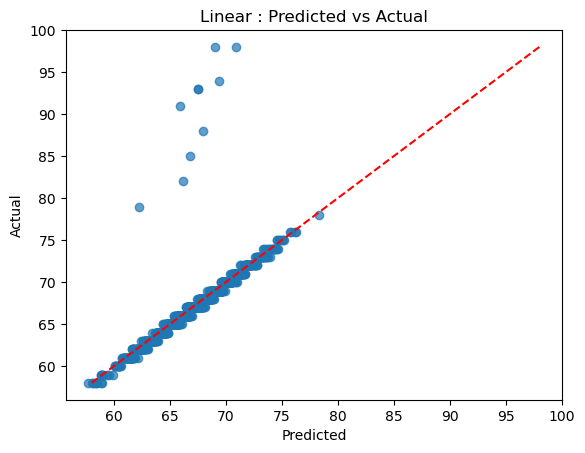

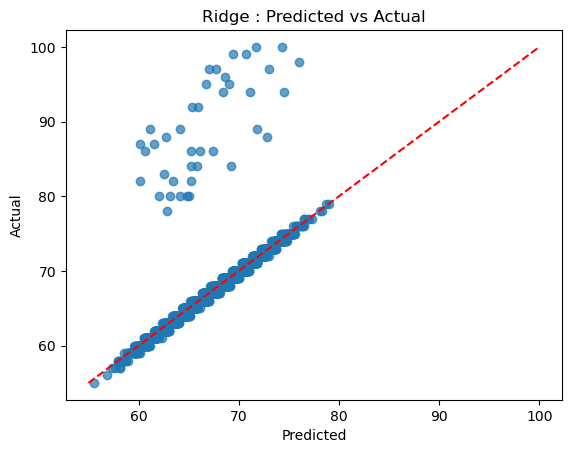

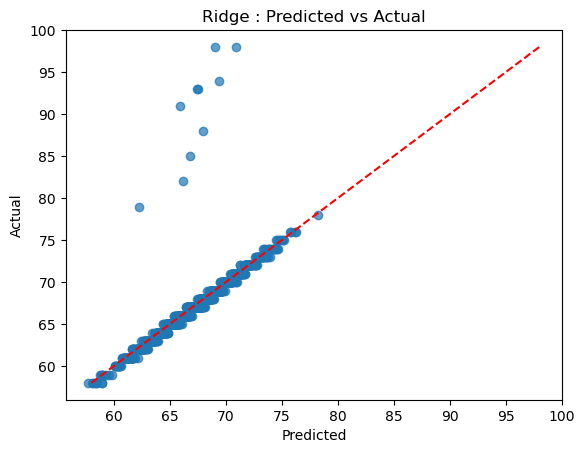

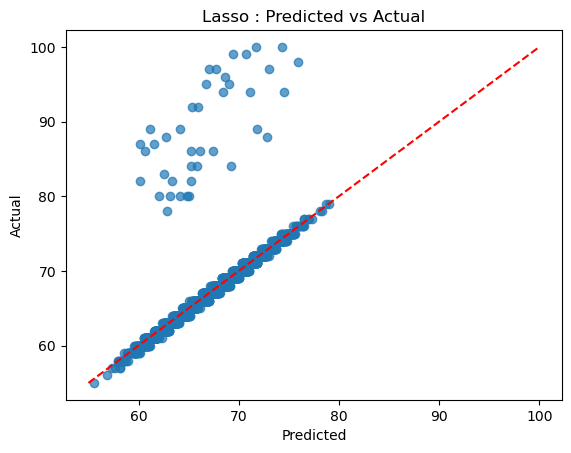

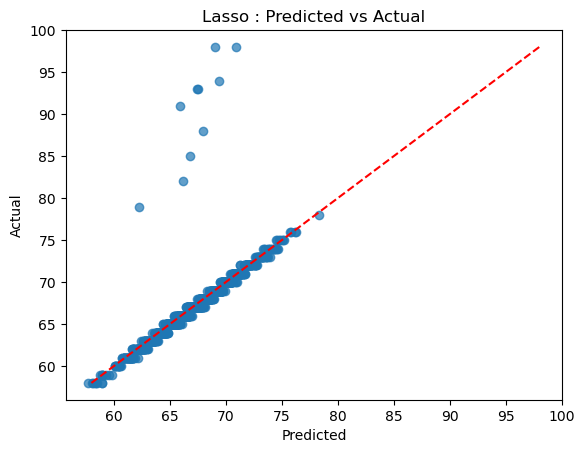

In [23]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

Since our Exam_Score is right skewed (most of the values are in the range of 60-75), it seems that our models start underpredicting, meaning that it only predicts in that 60-75 range. Cases where the real exam score is over 75 don't seem to be predictable

#### Checking feature importance

In [24]:
coeffs = pd.Series(result_models["Linear"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.294711
Hours_Studied                            1.751331
Previous_Scores                          0.700774
Tutoring_Sessions                        0.628750
Peer_Influence_Positive                  0.505743
Distance_from_Home_Near                  0.430654
Extracurricular_Activities               0.298541
Peer_Influence_Neutral                   0.262262
Internet_Access                          0.240348
Physical_Activity                        0.185357
Parental_Education_Level_Postgraduate    0.183237
Distance_from_Home_Moderate              0.156270
School_Type_Public                       0.003767
Gender_Male                             -0.013233
Sleep_Hours                             -0.039787
Parental_Education_Level_High School    -0.222007
Learning_Disabilities                   -0.244315
Teacher_Quality_Medium                  -0.265091
Motivation_Level_Medium                 -0.274492
Family_Income_Medium                    -0.281650


In [25]:
coeffs = pd.Series(result_models["Ridge"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.291649
Hours_Studied                            1.748958
Previous_Scores                          0.699783
Tutoring_Sessions                        0.627920
Peer_Influence_Positive                  0.504190
Distance_from_Home_Near                  0.428610
Extracurricular_Activities               0.298156
Peer_Influence_Neutral                   0.260944
Internet_Access                          0.239968
Physical_Activity                        0.184884
Parental_Education_Level_Postgraduate    0.183174
Distance_from_Home_Moderate              0.154434
School_Type_Public                       0.003654
Gender_Male                             -0.013184
Sleep_Hours                             -0.039829
Parental_Education_Level_High School    -0.221731
Learning_Disabilities                   -0.244072
Teacher_Quality_Medium                  -0.264528
Motivation_Level_Medium                 -0.272936
Family_Income_Medium                    -0.280068


In [26]:
coeffs = pd.Series(result_models["Lasso"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.293727
Hours_Studied                            1.750213
Previous_Scores                          0.699730
Tutoring_Sessions                        0.627788
Peer_Influence_Positive                  0.502786
Distance_from_Home_Near                  0.425521
Extracurricular_Activities               0.297577
Peer_Influence_Neutral                   0.259175
Internet_Access                          0.239242
Physical_Activity                        0.183977
Parental_Education_Level_Postgraduate    0.182543
Distance_from_Home_Moderate              0.151172
School_Type_Public                       0.002729
Gender_Male                             -0.012137
Sleep_Hours                             -0.038879
Parental_Education_Level_High School    -0.221283
Learning_Disabilities                   -0.243266
Teacher_Quality_Medium                  -0.263484
Motivation_Level_Medium                 -0.271411
Family_Income_Medium                    -0.278497


After scaling all of the data before running the models (at first we didn't do that), the coefficents of all the models are very similar.

#### Tests with some feature engineering

In [27]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours", "School_Type"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train2), columns=X_train2.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test2), columns=X_test2.columns)

ridge_alpha, _ = get_best_alpha(Ridge(), X_train_s, y_train, np.linspace(0.01, 10, 50))
lasso_alpha, _ = get_best_alpha(Lasso(), X_train_s, y_train, np.linspace(0.001, 1, 50))

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_alpha),
    "Lasso": Lasso(alpha=lasso_alpha),
}

result_models2, results2 = run_models(X_train_s, X_test_s, y_train, y_test, models, 3)

In [28]:
scores = find_scores(y_train2, y_test2, results2)

    Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  Linear     2.05827  2.04950    2.08662   0.72263  0.71785
1   Ridge     2.05827  2.04950    2.08662   0.72263  0.71785
2   Lasso     2.05828  2.04949    2.08683   0.72263  0.71779


After removing some of the features with low coefficents, every models Test RMSE was lovered by 0.003

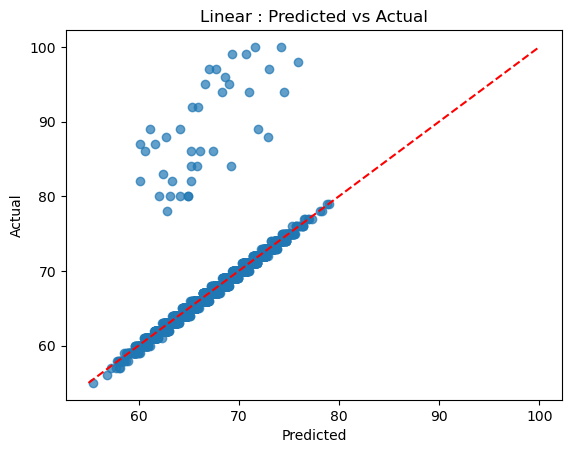

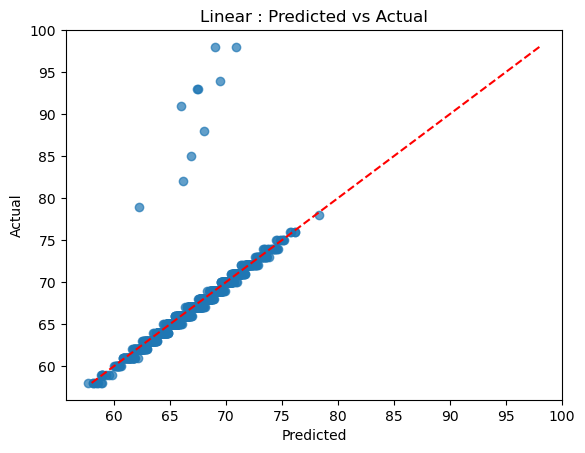

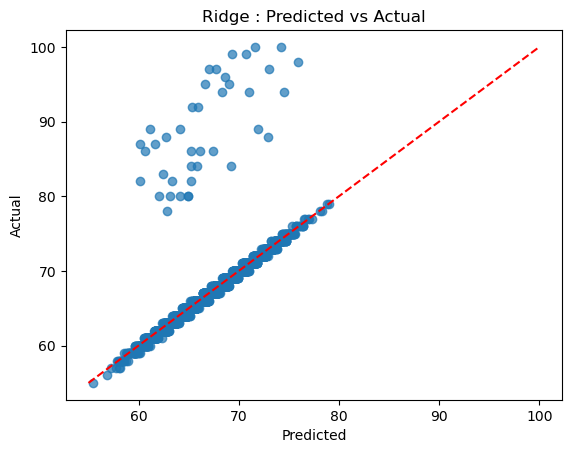

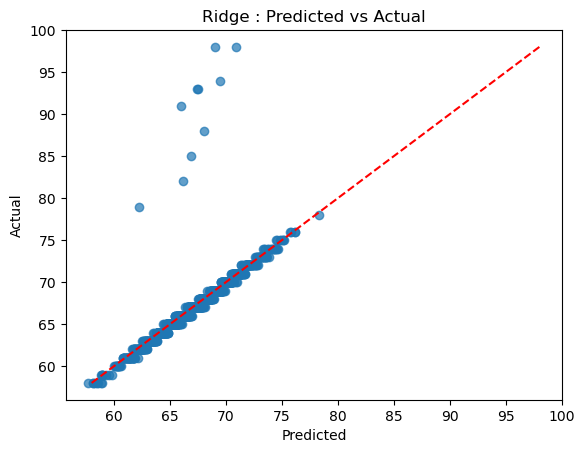

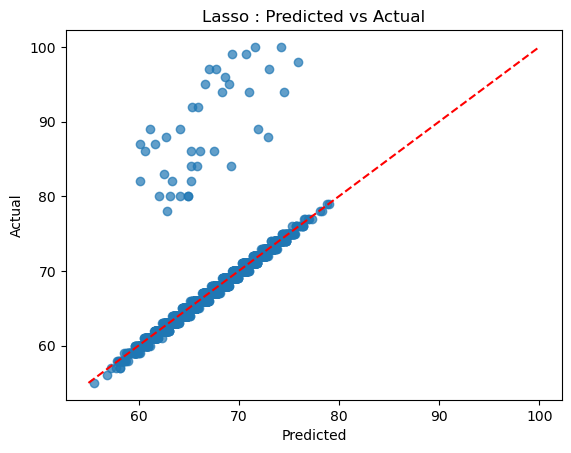

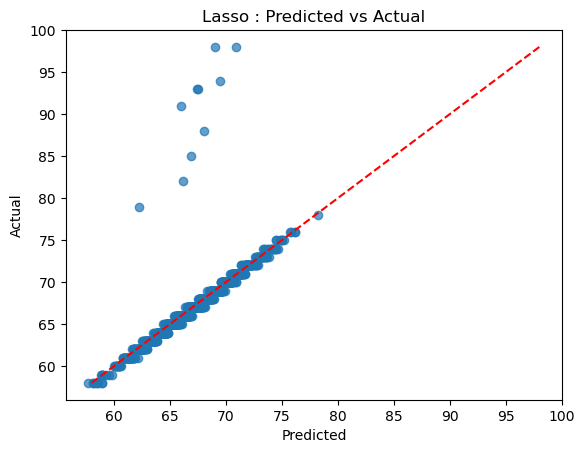

In [29]:
for res in results2:
    analysis(y_train2, res["y_train_pred"], "train", res["Model"])
    analysis(y_test2, res["y_test_pred"], "test", res["Model"])

#### Plot for the poster

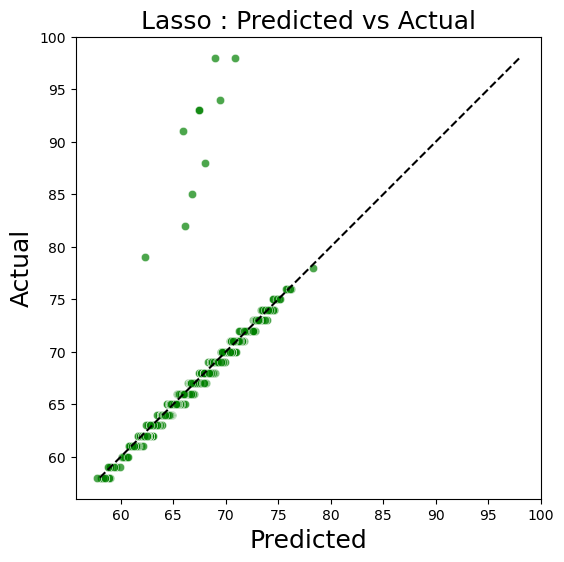

In [30]:
### For the poster

y_true = y_test
y_pred = results[2]["y_test_pred"]

df = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_true
})

plt.figure(figsize=(6,6))

sns.scatterplot(data=df, x="Predicted", y="Actual", color="green", alpha=0.7)

plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color="black", linestyle="--")

# Labels and title
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.title("Lasso : Predicted vs Actual", fontsize=18)

#plt.savefig("Lasso_Pred_Actual.pdf")
plt.show()

### Testing RandomForestRegressor and XGBoost

#### Hyperparameter tuning methods for RFR and XGB

In [31]:
def get_best_xgboost(X, y):
    from sklearn.model_selection import GridSearchCV
    
    params = {
        "n_estimators": [200, 400],
        "learning_rate": [0.03, 0.05],
        "max_depth": [3, 4],
        "min_child_weight": [4, 6, 8],
        "subsample": [0.7, 0.9],
        "colsample_bytree": [0.5, 0.8],
        "reg_lambda": [1, 5, 10],
        "gamma": [0, 1, 3]
    }

    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=5,
        n_jobs=-1
    )

    grid = GridSearchCV(
        estimator=xgb,
        param_grid=params,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X, y)

    print("Best XGBoost params:", grid.best_params_)

    return grid.best_estimator_

In [32]:
def get_best_random_forest(X, y): ### Hyper-Parameter tuning for Random Forest Regressor
    param_grid = {
        "n_estimators": [150, 250],
    "max_depth": [3, 5, 7],
    "min_samples_split": [4, 6, 10],
    "min_samples_leaf": [2, 4, 6],
    "max_features": ["sqrt", 0.5],
    }

    rf = RandomForestRegressor(random_state=5)

    grid = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X, y)
    
    print("Best RandomForest params: ", grid.best_params_)

    return grid.best_estimator_

#### Initial Random Forest and XGBoost models

In [33]:
X_train, X_test, y_train, y_test = get_dummies(data)

#normal_rf = RandomForestRegressor(random_state=5)
#normal_xgb = XGBRegressor(objective="reg:squarederror",random_state=5,n_jobs=-1)

best_rf = get_best_random_forest(X_train, y_train)
best_xgb = get_best_xgboost(X_train, y_train)

models = {
    "RandomForest": best_rf,
    "XGBoost": best_xgb
}

result_models, results = run_models(X_train, X_test, y_train, y_test, models, 3)

Best RandomForest params:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 250}
Best XGBoost params: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 400, 'reg_lambda': 10, 'subsample': 0.7}


In [34]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  RandomForest     2.24236  2.46960    2.52752   0.67080  0.58601
1       XGBoost     1.93514  2.11591    2.14164   0.75483  0.70277


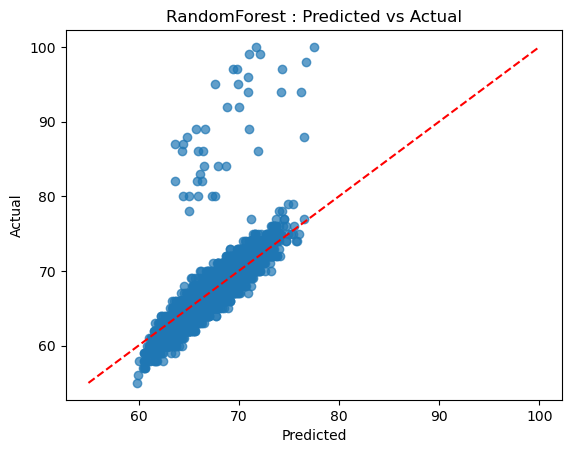

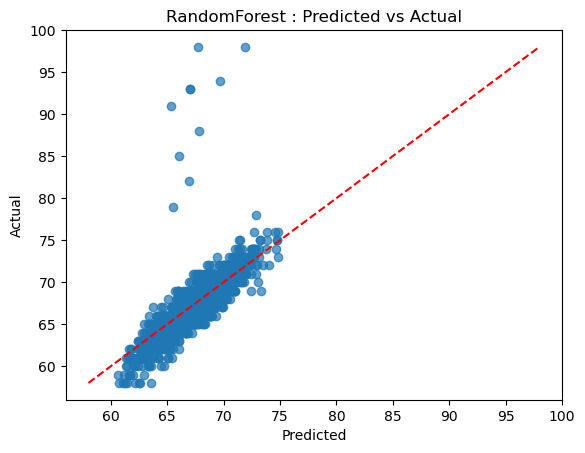

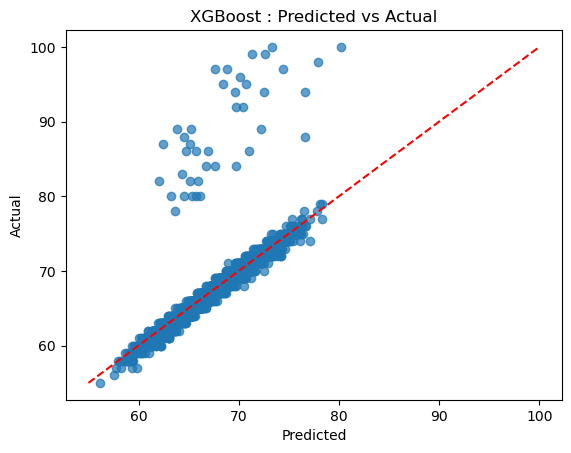

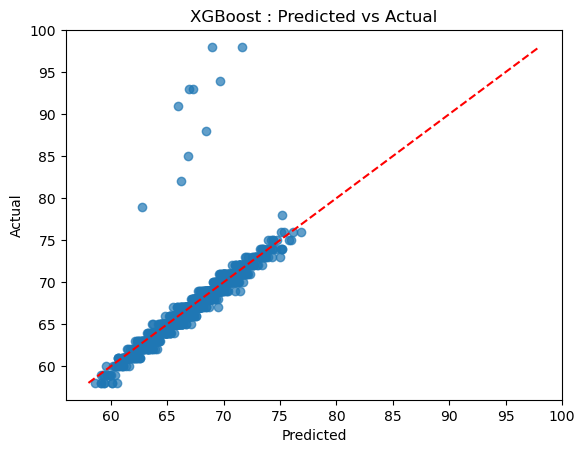

In [35]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

#### Checking for feature importances

In [36]:
importances = pd.Series(result_models["RandomForest"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

Attendance                               0.529430
Hours_Studied                            0.303367
Previous_Scores                          0.055196
Tutoring_Sessions                        0.024048
Access_to_Resources_Low                  0.017230
Parental_Involvement_Low                 0.013558
Sleep_Hours                              0.005420
Physical_Activity                        0.004893
Peer_Influence_Positive                  0.004761
Parental_Education_Level_High School     0.004225
Family_Income_Low                        0.003972
Motivation_Level_Low                     0.003630
Extracurricular_Activities               0.003606
Distance_from_Home_Near                  0.003480
Access_to_Resources_Medium               0.003043
Parental_Involvement_Medium              0.002902
Parental_Education_Level_Postgraduate    0.002735
Teacher_Quality_Medium                   0.002667
Learning_Disabilities                    0.002130
School_Type_Public                       0.001898


#### Random Forest AND XGB with less features

In [37]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours", "School_Type"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)

#normal_rf = RandomForestRegressor(random_state=5)
#normal_xgb = XGBRegressor(objective="reg:squarederror",random_state=5,n_jobs=-1)

best_rf = get_best_random_forest(X_train2, y_train2)
best_xgb = get_best_xgboost(X_train2, y_train2)

models = {
    "RandomForest": best_rf,
    "XGBoost": best_xgb
}

result_models, results = run_models(X_train2, X_test2, y_train2, y_test2, models, 3)

Best RandomForest params:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 250}
Best XGBoost params: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 400, 'reg_lambda': 10, 'subsample': 0.7}


In [38]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  RandomForest     2.21764  2.46467    2.52210   0.67802  0.58778
1       XGBoost     1.94224  2.11832    2.13983   0.75303  0.70327


In [39]:
print(len(data.columns)) # How many columns before feature engineering

20


In [40]:
print(len(data_less_features.columns)) # How many columns after feature engineering

17


After some feature engineering i could lower the test RMSE for XGBoost 0.007, but test RMSE for Random Forest went up by 0.004

## 4. Training classification models
The goal is to classify students as high-achievers and low-achievers.

### Preparation for training models

In [41]:
data_dum = pd.get_dummies(data, drop_first=True) 

X = data_dum.drop(columns=["Exam_Score"])
y = data_dum["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # for regression models

In [42]:
# Create binary label: 1 = high achiever, 0 = low achiever
threshold = 70
data["Label"] = (data[target] >= threshold).astype(int)

In [43]:
# checking balance
data["Label"].value_counts(normalize=True)

Label
0    0.752117
1    0.247883
Name: proportion, dtype: float64

In [44]:
y = data["Label"]
X = data_dum.drop(columns=["Exam_Score"])
X.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Physical_Activity,Learning_Disabilities,Parental_Involvement_Low,...,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,0,7,73,1,0,3,0,True,...,False,True,True,False,True,True,False,False,True,True
1,19,64,0,8,59,1,2,4,0,True,...,False,True,True,False,False,False,False,True,False,False
2,24,98,1,7,91,1,2,4,0,False,...,False,True,True,True,False,False,True,False,True,True
3,29,89,1,8,98,1,1,4,0,True,...,False,True,True,False,False,True,False,True,False,True
4,19,92,1,6,65,1,3,4,0,False,...,False,False,True,True,False,False,False,False,True,False


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5, stratify=y) #stratify=y makes sure classes are balanced

In [46]:
y_train.value_counts(normalize=True).sort_values(ascending=False)

Label
0    0.752016
1    0.247984
Name: proportion, dtype: float64

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models

In [72]:
models = {
    "K Nearest Neighbours": KNeighborsClassifier(
        n_neighbors = 40,
        metric='euclidean'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        class_weight="balanced",
        random_state=5
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,
        class_weight="balanced",
        random_state=5
    ),
    "Logistic Regression (balanced)": LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=5
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        random_state=5
    )
}

### Training models

In [73]:
y_pred = {}
y_proba = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred[name] = model.predict(X_test_scaled)
    # probability of class 1 (high-achiever)
    y_proba[name] = model.predict_proba(X_test_scaled)[:, 1]


=== K Nearest Neighbours ===
Accuracy: 0.8061650992685475
Precision: 0.9904761904761905
Recall: 0.21940928270042195
F1: 0.3592400690846287


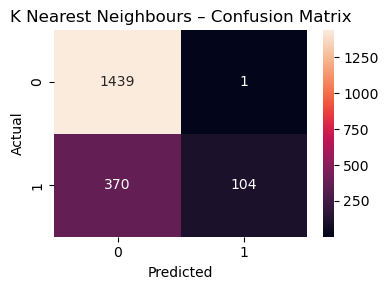


=== Random Forest ===
Accuracy: 0.9211076280041798
Precision: 0.9473684210526315
Recall: 0.7215189873417721
F1: 0.8191616766467066


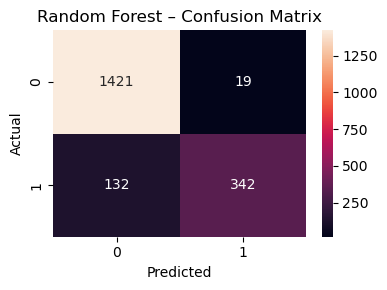


=== Decision Tree ===
Accuracy: 0.845350052246604
Precision: 0.6660447761194029
Recall: 0.7531645569620253
F1: 0.7069306930693069


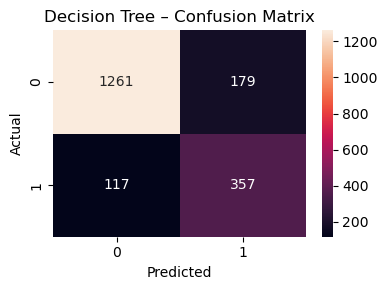


=== Logistic Regression (balanced) ===
Accuracy: 0.9508881922675027
Precision: 0.8505535055350554
Recall: 0.9725738396624473
F1: 0.90748031496063


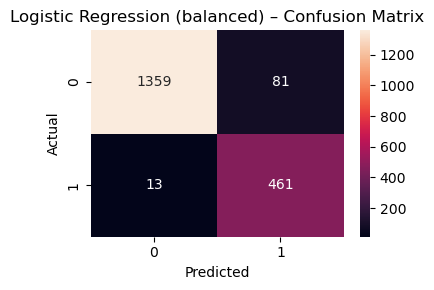


=== Logistic Regression ===
Accuracy: 0.9848484848484849
Precision: 0.9723991507430998
Recall: 0.9662447257383966
F1: 0.9693121693121693


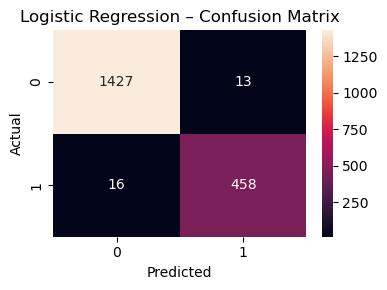

In [74]:
def evaluate_model(y_test, y_pred, name):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred)) # precision (täpsus)
    print("Recall:", recall_score(y_test, y_pred)) # finding most at-risk students (milline leiab enim)
    print("F1:", f1_score(y_test, y_pred)) # model balance (tasakaal, mida kõrgem, seda vähem fluffi)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

for name in models.keys():
    evaluate_model(y_test, y_pred[name], name)

Best of these models seems to be Logistic Regression. Tried two ways, class weight balanced and not balanced. The balanced one has accuracy score 0.951 and recall score 0.973. Model with not balanced class weights has accuracy score 0.985 and recall score 9.066.

### Decision Tree visualization

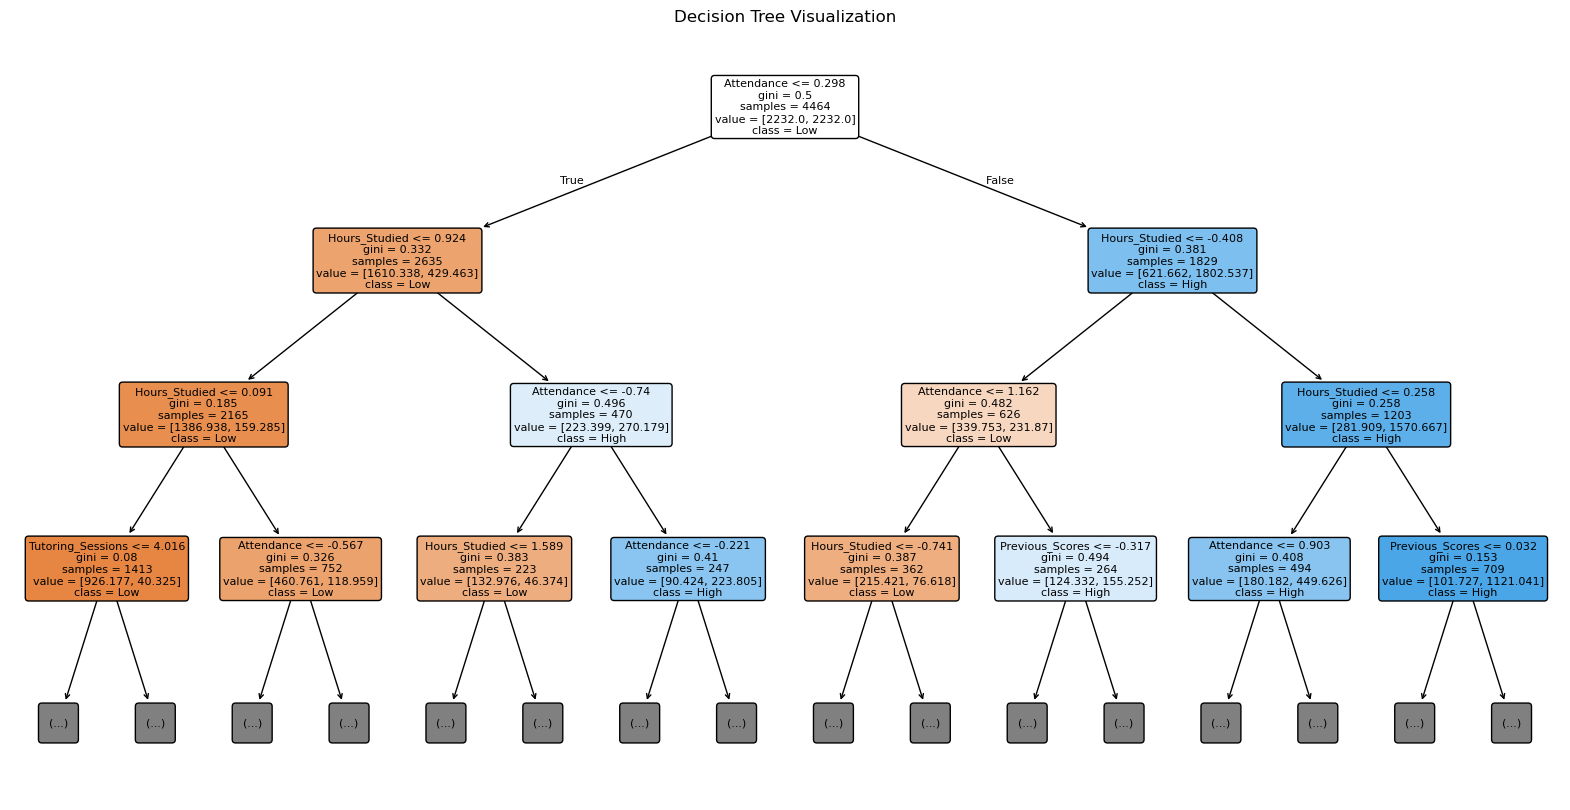

In [77]:
dt_model = models["Decision Tree"]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Low", "High"],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3
)
plt.title("Decision Tree Visualization")
plt.show()

The root of the tree is the most important feature, so as seen before, attendance matters the most in this case (attendance <= 0.298). Students who have attendance rate lower than this move to the left branch where are most of the low-achievers. As only first three levels of the tree is shown, we can say attendance, hours spent studying and previous scores/tutoring sessions matter the most. 

Gini index - 0: Every individual in this node are in the same class, 0.5: random mix of classes.

Value - [x, y]: approximately x low-achievers and y high-achievers.

### Random Under Sampling

In [51]:
r = RandomUnderSampler(random_state=5)
X_train_r, y_train_r = r.fit_resample(X_train_scaled, y_train)

In [52]:
y_pred = {}
y_proba = {}

for name, model in models.items():
    model.fit(X_train_r, y_train_r)
    y_pred[name] = model.predict(X_test_scaled)
    # probability of class 1 (high-achiever)
    y_proba[name] = model.predict_proba(X_test_scaled)[:, 1]


=== Logistic Regression (balanced) ===
Accuracy: 0.9440961337513062
Precision: 0.8306306306306306
Recall: 0.9725738396624473
F1: 0.8960155490767736


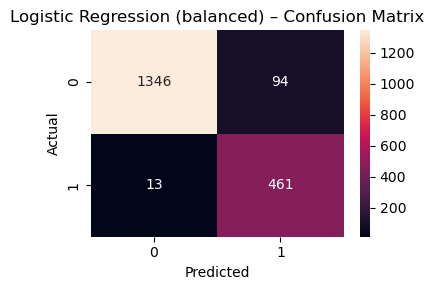


=== Logistic Regression ===
Accuracy: 0.9440961337513062
Precision: 0.8306306306306306
Recall: 0.9725738396624473
F1: 0.8960155490767736


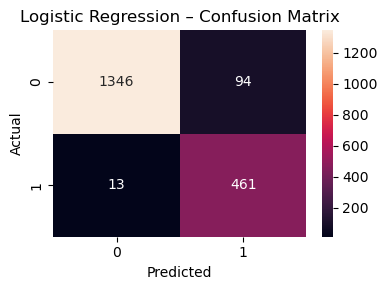


=== Decision Tree ===
Accuracy: 0.8051201671891327
Precision: 0.5748148148148148
Recall: 0.8185654008438819
F1: 0.6753698868581375


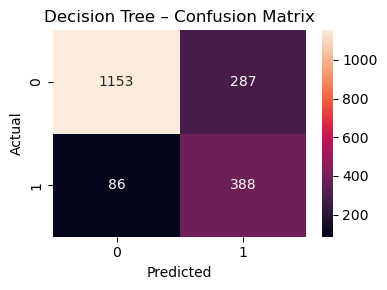


=== Random Forest ===
Accuracy: 0.8928944618599791
Precision: 0.7208538587848933
Recall: 0.9261603375527426
F1: 0.8107109879963066


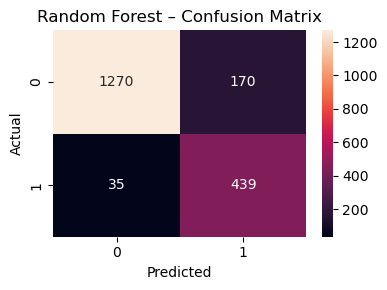


=== K Nearest Neighbours ===
Accuracy: 0.8087774294670846
Precision: 0.5694087403598972
Recall: 0.9345991561181435
F1: 0.707667731629393


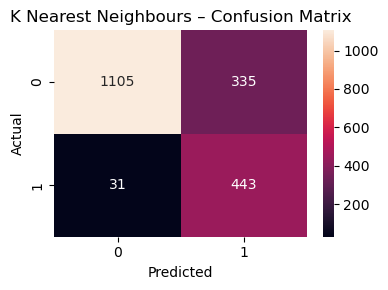

In [63]:
for name in models.keys():
    evaluate_model(y_test, y_pred[name], name)

Undersampling does not seem to produce better results.

### Top features
Which of the fearures affect most if student is a low-achiever or high-achiever, using Random Forest.

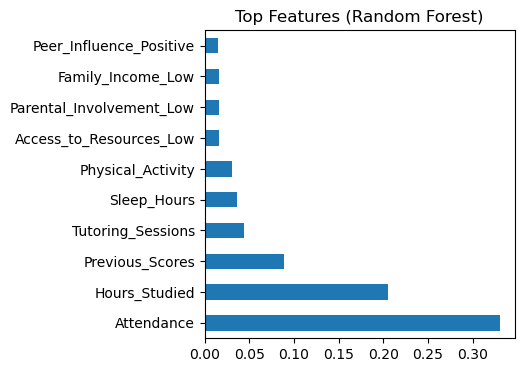

In [54]:
importance = pd.Series(models["Random Forest"].feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind="barh", figsize=(4,4))
plt.title("Top Features (Random Forest)")
plt.show()

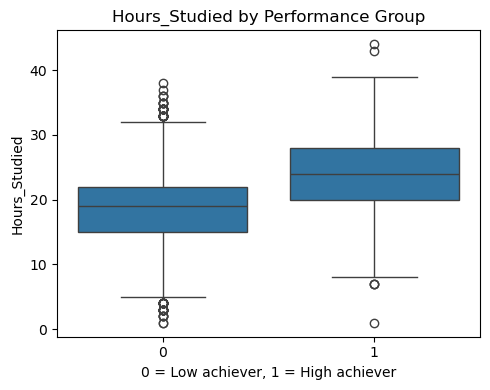

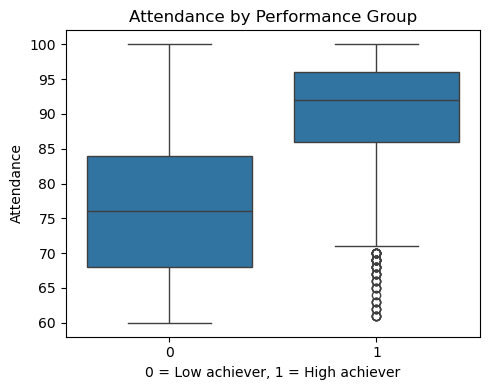

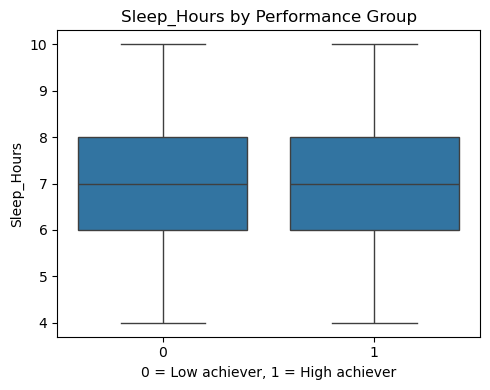

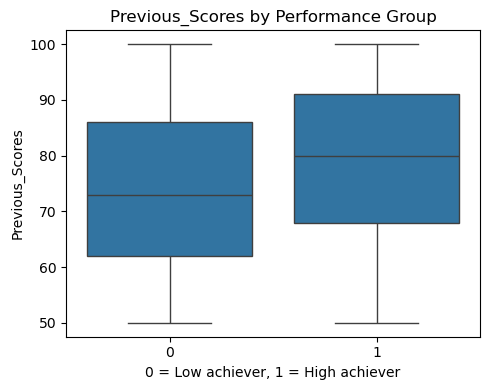

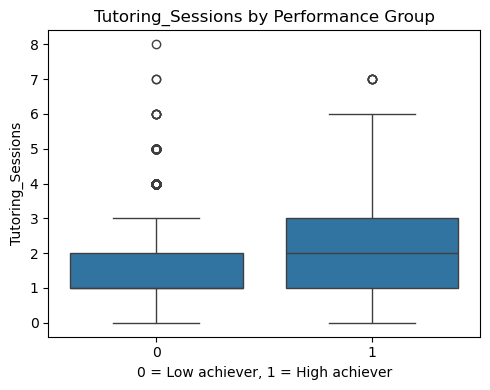

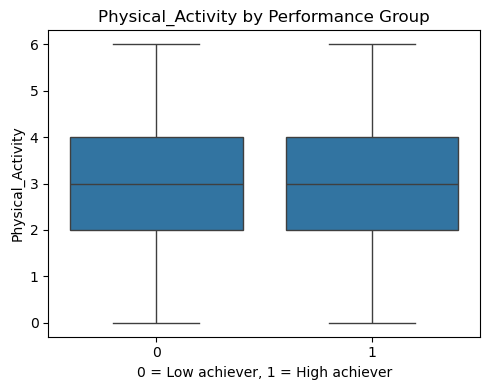

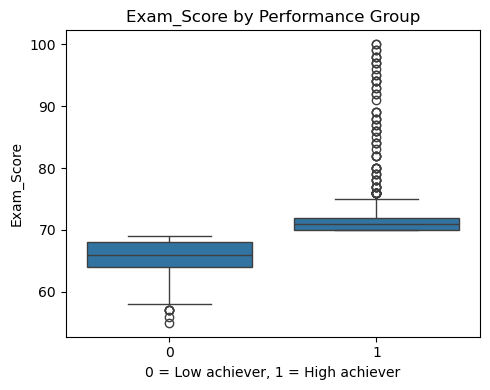

In [55]:
for col in numeric:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=data, x="Label", y=col)
    plt.title(f"{col} by Performance Group")
    plt.xlabel("0 = Low achiever, 1 = High achiever")
    plt.tight_layout()
    plt.show()

## 5. Comparison of Regression and Classification Approaches

To evaluate the two paths for predicting student performance, we compared regression models (predicting the exact exam score) with classification models (predicting whether a student is a high or low achiever). Although both approaches performed well, they differ significantly in interpretability and practical usefulness.

### Regression Models
The regression path focused on estimating the student’s final exam score as a continuous value. Among the regression models tested, Lasso Regression performed the best after cross-validation and hyperparameter tuning, achieving the lowest RMSE among the for models. Regression provided a detailed understanding of how features contribute to predicting the numerical exam score. Features such as hours studied, attendance, and previous scores had the strongest impact.

However, regression has one important limitation, it does **not directly identify at-risk students**. To classify students needing support, an additional threshold must be chosen manually (e.g., <70 points = at-risk). This introduces subjectivity and makes regression less actionable for early intervention.

### Classification Models
Classification models predict a binary label indicating whether a student is a high- or low-achiever. This makes the output immediately actionable for teachers and school staff. Logistic Regression achieved the highest recall among classification models (up to 0.973), meaning it correctly identified 97% of low-achieving students. Random Forest and Decision Tree models did not perform so well.

Classification outputs are easy to understand and require no additional thresholds while training the model and interpreting results as the threshold is set while preparing the data. Confusion matrices clearly show how well the models detect at-risk students, making this approach highly suitable for practical intervention.

### Key Differences
Regression provides **more precise numerical predictions**, which are useful for forecasting performance, comparing trends and understanding how features influence grades.  
Classification provides **clear, interpretable decisions**, making it more useful for identifying students who need academic support.

### Conclusion
Both approaches offer meaningful insights, but they serve different purposes. Regression is useful for modeling the underlying performance patterns and estimating expected exam scores, while classification is more practical for real-world educational decision-making. Classification models directly highlight at-risk students and therefore provide more actionable results for schools aiming to offer timely support.

